# layer check (using resec_model_extend.h5)

In [2]:
from keras.models import load_model

In [4]:
model_extend = load_model('resec_model_extend.h5')

In [23]:
model.get_weights()[0].shape

(3, 3, 3, 1, 32)

In [39]:
model.layers[3].get_weights()[0].shape

(3, 3, 3, 1, 32)

In [34]:
model.layers[4].name

'input_219'

In [15]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_217 (InputLayer)          (None, 60, 50, 55, 1 0                                            
__________________________________________________________________________________________________
input_218 (InputLayer)          (None, 60, 50, 55, 1 0                                            
__________________________________________________________________________________________________
conv3d_655 (Conv3D)             (None, 58, 48, 53, 3 896         input_217[0][0]                  
__________________________________________________________________________________________________
conv3d_658 (Conv3D)             (None, 58, 48, 53, 3 896         input_218[0][0]                  
__________________________________________________________________________________________________
input_219 

# info statistic relation

# basic information

In [41]:
import pandas as pd
info = pd.read_csv('/data2/pancreas/Nifti_data/data_list.csv')
image_path = "/data2/pancreas/Nifti_data/image"
label_path = "/data2/pancreas/Nifti_data/label"


resec = np.load("resec.npy")
y = np.load("resec_y.npy")
shape_tumor = np.load("shape_tumor.npy")

In [47]:
np.where(y[:-50] == 1)[0].shape

(63,)

In [48]:
info.head()

,patient_id,case_id,exam_date,type,cut,200_list,diff_patient_list,add_date,resection,stage,size
0,26,NP1,20180101.0,healthy,fine,validation,True,20190210,NaN,NaN,NaN
1,236,AD1,20170928.0,healthy,fine,validation,True,20190210,NaN,NaN,NaN
2,216,AD10,20160920.0,healthy,fine,train,True,20190210,NaN,NaN,NaN
3,185,AD100,20140102.0,healthy,fine,train,True,20190210,NaN,NaN,NaN
4,164,AD101,20140204.0,healthy,fine,test,True,20190210,NaN,NaN,NaN


In [57]:
info['total'] = [1]*len(info)
#pd.DataFrame(info.groupby(['cut', 'type']).sum().total)
resec_size = pd.DataFrame(info.groupby(['resection', 'size']).sum().total)


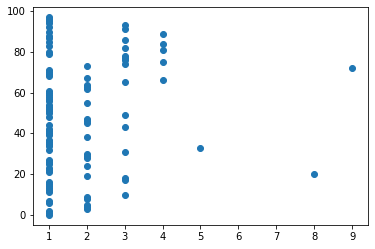

In [64]:
from matplotlib import pyplot as plt
plt.scatter(resec_size.total.values, range(len(resec_size.total.values)))

In [92]:
list(resec_size.total.index[:][1])

[0.0, 1.6]

# check the shape of the tumor